In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1.
    # if TimeTaken is in range(x1, y1) assign the row the label "Short"
    # if TimeTaken is in range(x2, y2) assign the row the label "Medium"
    # if TimeTaken is in range(x3, y3) assign the row the label "Long"

# 2.
    # split the data into these 3 classes, creating 3 csv's

# 3.
    # delete the class labels (to avoid correlation/collinearity with TimeTaken)

# 4.
    # train 3 regression models, one for each class

# 5.
    # create model to classify unseen data into these 3 classes

In [4]:
df = pd.read_csv("../../../Data/ABT_Incident_HoldDuration_cleaned.csv",encoding='latin-1',low_memory=False)

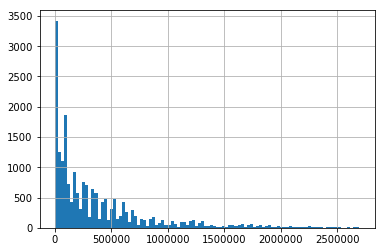

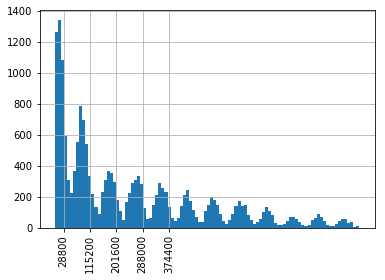

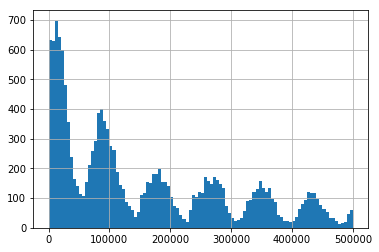

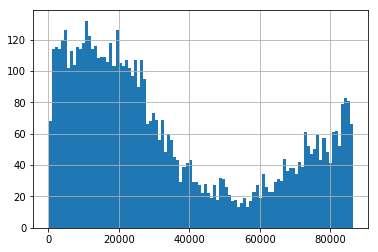

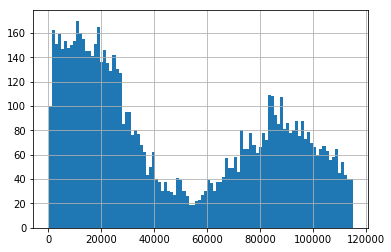

In [82]:
df["TimeTaken"].hist(bins=100)
plt.show()

maxv = df["TimeTaken"] < 1000000
minv = df["TimeTaken"] > 0
df["TimeTaken"][maxv & minv ].hist(bins=100)
plt.xticks(bins, rotation="vertical")
plt.show()

maxv = df["TimeTaken"] < 500000
minv = df["TimeTaken"] > 0
df["TimeTaken"][maxv & minv ].hist(bins=100)
plt.show()

maxv = df["TimeTaken"] < 86400
minv = df["TimeTaken"] > 0
df["TimeTaken"][maxv & minv ].hist(bins=100)
plt.show()

maxv = df["TimeTaken"] < 115200
minv = df["TimeTaken"] > 0
df["TimeTaken"][maxv & minv ].hist(bins=100)
plt.show()

In [39]:
print(8*60*60)
print(24*60*60)
print(8*60*60+24*60*60)
print(1000000/60/60/24)

28800
86400
115200
11.574074074074074


In [79]:
def get_bins_daily(inbin, day, num):
    bin_list = [inbin]
    for i in range(num):
        bin_list.append(bin_list[i]+day)
    return bin_list

bin1 = 8*60*60
day = 24*60*60
num_bins = 4
bins = get_bins_daily(bin1, day, num_bins)


def split_df_into_k_bins(df, num_bins):
    bin1 = 8*60*60
    day = 24*60*60
    bins = get_bins_daily(bin1, day, num_bins)
    dflist = []
    prev_bin = 0
    for bin0 in bins:
        dflist.append(pd.DataFrame(df.loc[(df["TimeTaken"] < bin0) & (df["TimeTaken"] >= prev_bin)]))
        prev_bin = bin0
    dflist.append(pd.DataFrame(df.loc[df["TimeTaken"] >= bins[-1]]))
    return dflist

k_split_df = split_df_into_k_bins(bins, df)

print(len(split_df))
lengthsdfs = [len(split_df[i]) for i in range(len(split_df))]
print(lengthsdfs)
print(sum(lengthsdfs))
print(len(df))

6
[3584, 4355, 2158, 1863, 1497, 6588]
20045
20045


## split timetaken by volume

In [95]:
def split_df_into_3(bins, df):
    dflist = []
    prev_bin = 0
    for bin0 in bins:
        dflist.append(pd.DataFrame(df.loc[(df["TimeTaken"] < bin0) & (df["TimeTaken"] >= prev_bin)]))
        prev_bin = bin0
    dflist.append(pd.DataFrame(df.loc[df["TimeTaken"] >= bins[-1]]))
    return dflist
bins = [92000, 370000]
print(92000/60/60)
print(370000/60/60/24)
split_df_3 = split_df_into_3(bins, df)

print(len(split_df_3))
lengthsdfs = [len(split_df_3[i]) for i in range(len(split_df_3))]
print(lengthsdfs)
print(sum(lengthsdfs))
print(len(df))

25.555555555555554
4.282407407407407
3
[6654, 6727, 6664]
20045
20045


In [96]:
split_df_3[0].to_csv("../../../Data/split_small.csv", index=False)
split_df_3[1].to_csv("../../../Data/split_medium.csv", index=False)
split_df_3[2].to_csv("../../../Data/split_large.csv", index=False)